In [1]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
import matplotlib as mpl
from matplotlib.colors import LogNorm

In [2]:
# Custom rcParams

mpl.rcParams['font.size'] = 15
mpl.rcParams['axes.linewidth'] = 1.5
mpl.rcParams['xtick.direction'] = 'in'
mpl.rcParams['ytick.direction'] = 'in'
mpl.rcParams['xtick.minor.visible'] = 'true'
mpl.rcParams['ytick.minor.visible'] = 'true'
mpl.rcParams['xtick.major.width'] = 1.5
mpl.rcParams['ytick.major.width'] = 1.5
mpl.rcParams['xtick.minor.width'] = 1.0
mpl.rcParams['ytick.minor.width'] = 1.0
mpl.rcParams['xtick.major.size'] = 7.5
mpl.rcParams['ytick.major.size'] = 7.5
mpl.rcParams['xtick.minor.size'] = 3.5
mpl.rcParams['ytick.minor.size'] = 3.5
mpl.rcParams['xtick.top'] = True
mpl.rcParams['ytick.right'] = True    
# %set_env MANPATH=/home/paul.torrey/local/texlive/2018/texmf-dist/doc/man:$MANPATH
# %set_env INFOPATH=/home/paul.torrey/local/texlive/2018/texmf-dist/doc/info:$INFOPATH
# %set_env PATH=/home/paul.torrey/local/texlive/2018/bin/x86_64-linux:/home/paul.torrey/local/texlive/2018/texmf-dist:$PATH
# mpl.rcParams['text.usetex']        = True
# # mpl.rcParams['text.latex.unicode'] = True
# mpl.rcParams['font.family']        = 'serif'
# mpl.rc('font',**{'family':'sans-serif','serif':['Times New Roman'],'size':15})
# mpl.rc('text', usetex=True)

In [3]:
save_dir='./figures/'

In [4]:
def value(hdf5_value):
    return float(np.array(hdf5_value))

In [5]:
def get_info( file, redshifts=np.arange(0,9), FIRE=False, suite='high_redshift' ):
    all_grad = []
    all_mass = []
    all_SFRs = []
    all_RSHM = []
    all_RSFR = []

    with h5py.File(file,'r') as f:

        for z in redshifts:
            
            if FIRE:
                this_suite    = f[ suite ]
                this_redshift = this_suite[ 'z=%s' %z ]
            else:
                this_redshift = f['z=%s'%z]

            these_gradients_SF = []
            these_masses       = []
            these_SFR          = []
            these_RSHM         = []
            these_RSFR         = []

            for subhalo in this_redshift:

                these_gradients_SF.append( value(this_redshift[subhalo]['StarFormingRegion']) )
                # these_gradients_SF.append( value(this_redshift[subhalo]['ObservationalEquiv']) )
                these_masses.append( value(this_redshift[subhalo]['StellarMass']) )
                these_SFR.append( value(this_redshift[subhalo]['StarFormationRate']) )
                these_RSHM.append( value(this_redshift[subhalo]['StellarHalfMassRad']) )
                these_RSFR.append( value(this_redshift[subhalo]['SFRHalfMassRad']) )

            all_grad.append( these_gradients_SF )
            all_mass.append( these_masses       )
            all_SFRs.append( these_SFR          )
            all_RSHM.append( these_RSHM         )
            all_RSFR.append( these_RSFR         )
            
    return all_grad, all_mass, all_SFRs, all_RSHM, all_RSFR

def summary(all_grad):
    
    means     = []
    stds_up   = []
    stds_down = []
    counts    = []

    for index in range(len(all_grad)):

        these_gradients = all_grad[index]

        mask = ~np.isnan( these_gradients )

        means    .append(np.nanmedian( these_gradients ))
        stds_up  .append(np.nanpercentile( these_gradients, 84 ))
        stds_down.append(np.nanpercentile( these_gradients, 16 ))
        counts   .append(sum(mask))

    means     = np.array(means    )
    stds_up   = np.array(stds_up  )
    stds_down = np.array(stds_down)
    counts    = np.array(counts   )
    
    return np.array(means), np.array(stds_up), np.array(stds_down), np.array(counts)

In [6]:
grad_TNG, mass_TNG, SFRs_TNG, RSHM_TNG, RSFR_TNG = get_info( 'TNG_Gradients.hdf5' )
grad_EAGLE, mass_EAGLE, SFRs_EAGLE, RSHM_EAGLE, RSFR_EAGLE = get_info( 'EAGLE_Gradients.hdf5' )


grad_FIRE, mass_FIRE, SFRs_FIRE, RSHM_FIRE, RSFR_FIRE = get_info( 'FIRE_Gradients.hdf5', 
                                                                  FIRE=True,
                                                                  suite='high_redshift',
                                                                  redshifts=np.arange(5.0,10.5,0.5))

In [7]:
grad_FIRE2, mass_FIRE2, SFRs_FIRE2, RSHM_FIRE2, RSFR_FIRE2 = get_info( 'FIRE_Gradients.hdf5', 
                                                                       FIRE=True,
                                                                       suite='core',
                                                                       redshifts=np.arange(0.0,10.5,0.5))

In [8]:
mean_TNG, std_up_TNG, std_down_TNG, count_TNG = summary(grad_TNG)

mean_EAGLE, std_up_EAGLE, std_down_EAGLE, count_EAGLE = summary(grad_EAGLE)

mean_FIRE, std_up_FIRE, std_down_FIRE, count_FIRE = summary(grad_FIRE)

mean_FIRE2, std_up_FIRE2, std_down_FIRE2, count_FIRE2 = summary(grad_FIRE2)

/scratch/local/20941229/ipykernel_2015523/3388147914.py:54: RuntimeWarning: All-NaN slice encountered
  means    .append(np.nanmedian( these_gradients ))
/home/alexgarcia/.local/lib/python3.11/site-packages/numpy/lib/nanfunctions.py:1384: RuntimeWarning: All-NaN slice encountered
  return _nanquantile_unchecked(
/home/alexgarcia/.local/lib/python3.11/site-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/home/alexgarcia/.local/lib/python3.11/site-packages/numpy/lib/nanfunctions.py:1562: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


In [9]:
H21_x = np.array([
0.14429857058417106  ,
0.04468069164745003  ,
-0.054803986047169406,
-0.15838460193641257 ,
0.646600454549239    ,
0.5472489780967211   ,
0.4477809505573642   ,
0.3485127248811599   ,
1.1403941091750687   ,
1.0412757348962285   ,
0.9417577568910835   ,
0.8423563299727772   ,
2.1455972826946614   ,
2.0501419425736147   ,
1.9463948251317447   ,
1.8468934972818625   ,
3.1543802395957345   ,
3.0553617662484704   ,
2.9555773857591223   ,
2.8512808131935836   ,
])

H21_y = np.array([
-0.016403732964809847,
-0.01405772608829571,
-0.017865616596874703,
-0.03244116251384038,
-0.02275077215095027,
-0.03271256004462238,
-0.037289687726338006,
-0.051097661485693294,
-0.036017615864267896,
-0.056748724181852964,
-0.05901814034415867,
-0.06667221671842086,
-0.07640423246946776,
-0.06636751887711351,
-0.07325069306271281,
-0.07628934639815513,
-0.08217684129904515,
-0.10752337265545,
-0.09748499404756952,
-0.07898334151965969
])

H21_up_x = np.array([
0.1440654684104934   ,
0.044464239629034896 ,
-0.059432729210199486,
-0.15886745643903133 ,
0.6463007517545103   ,
0.5468327242151538   ,
0.44726479574422084  ,
0.3478800189811775   ,
1.1399612051382384   ,
1.0406763293067711   ,
0.9411084008358381   ,
0.8416403732964812   ,
2.144914626328891    ,
2.0450469950632293   ,
1.9455623173686099   ,
1.8460776396739904   ,
3.1534478309010234   ,
3.0543294566221837   ,
2.950149435143483    ,
2.850381704809398    ,
])

H21_up_y = np.array([
 -0.005634412540896888,
 -0.004057642837519401,
 -0.0040176824648889276,
 -0.010133284492877828,
 -0.008904503034490752,
 -0.01348163071620638,
 -0.01344333535910218,
 -0.021866648906500988,
 -0.016017449362715278,
 -0.029056185948933957,
 -0.029017890591829743,
 -0.03359501827354536,
 -0.04486550837086556,
 -0.03098094389730184,
 -0.03478883440588082,
 -0.03859672491445981,
 -0.039099559603393313,
 -0.05983066792097838,
 -0.046713675605025026,
 -0.03744453417028115
])

H21_down_x = np.array([
0.144964576794679   ,
0.04542994863427152 ,
-0.05345532347089099,
-0.15671958641014339,
0.647366361691323   ,
0.5483478883440593  ,
0.4492794645310072  ,
0.35004453916532796 ,
1.1414430689566184  ,
1.0425244965409308  ,
0.94315636993315    ,
0.8437882433253696  ,
2.1468127440288383  ,
2.047611118973685   ,
1.952588682889468   ,
1.848508562342344   ,
3.1564948093140974  ,
3.0572265836378927  ,
2.9579583579616884  ,
2.857591222038146   ,
])

H21_down_y = np.array([
-0.047173219890275425,
-0.04867339887944448,
-0.0801738276209425,
-0.10936487982750434,
-0.058135682115235676,
-0.08348221347164059,
-0.10652103330863555,
-0.12186748141426418,
-0.08447955777187618,
-0.11444151216710094,
-0.1236340628876364,
-0.13282661360817186,
-0.13255854610844245,
-0.1494434685603443,
-0.1594069214695427,
-0.15090535219240916,
-0.17986996228739838,
-0.19367793604675368,
-0.20748590980610895,
-0.17052423013844606
])

H21_line_x = np.array([ 3.0031302291893875 , -0.00703469059848949 ])
H21_line_y = np.array([-0.09442636052581194, -0.024807066325893426])

H21_slope, H21_intercept = np.polyfit( H21_line_x, H21_line_y, 1 )

JWST_x = np.array([
7.248902974158947,
6.288326252002507,
])

JWST_y = np.array([
-0.3585150100996026,
-0.2881381904297555
])

JWST_down_x = np.array([
7.25252490074528 , 
6.280873441526781, 
])

JWST_down_y = np.array([
-0.49904576164936953,
-0.3989691439715817
])

JWST_up_x = np.array([
7.255589607856795,
6.295779062478234,
])

JWST_up_y = np.array([
-0.2179563975760952,
-0.17730723688792938,
])

JWST_left_x = np.array([
7.640697917392213, 
6.73159434422233 , 
])

JWST_left_y = np.array([
-0.3601588075503239,
-0.28694016855889104
])

JWST_right_x = np.array([
6.857177683360033,
5.844988507348331,
])

JWST_right_y = np.array([
 -0.35957372710176205,
 -0.28663369784773995
])

T_21_x = np.array([
0.05253940455341499,
0.23467600700525404,
0.4133099824868651 ,
0.5499124343257442 ,
0.6584938704028023 ,
0.777583187390543  ,
0.9106830122591942 ,
1.3064798598949212 ,
1.5656742556917689 ,
1.7828371278458846 ,
2.052539404553415  ,
2.283712784588441  ,
2.5464098073555164 ,

])

T_21_y = np.array([
-0.0017691700147659528,
-0.00034339480100264996,
-0.005189382232752948,
0.000977988393255802,
-0.006950310772294854,
0.0007994230967343641,
-0.002442223824731249,
0.0019532296281035144,
-0.0013873149960509368,
0.001579616084612545,
-0.0017691700147659528,
0.005892654785206619,
-0.008431029154218561
])

T_21_x_up = np.array([
0.05253940455341499, 
0.2311733800350262 , 
0.4133099824868651 , 
0.5464098073555166 , 
0.679509632224168  , 
0.777583187390543  , 
0.9106830122591942 , 
1.299474605954466  , 
1.5551663747810858 , 
1.7828371278458846 , 
2.0490367775831873 , 
2.280210157618213  , 
2.549912434325744  , 
])

T_21_y_up = np.array([
0.009211222142096798,
0.015345626867209305,
0.016771402080972553,
0.0213728924144089,
0.0322488925517668,
0.04001510937124417,
0.019518560488994252,
0.05686068472923325,
0.02842484804780057,
0.05805020431990662,
0.046861028124034226,
0.05609148037498715,
0.16411524329521654
])

T_21_x_down=np.array([
0.05604203152364273, 
0.23467600700525404, 
0.41681260945709275, 
0.5499124343257442 , 
0.6619964973730297 , 
0.777583187390543  , 
0.9141856392294221 , 
1.3029772329246934 , 
1.5551663747810858 , 
1.7828371278458846 , 
2.0490367775831873 , 
2.283712784588441  , 
2.549912434325744  , 
])

T_21_y_down=np.array([
-0.01902681913395826,
-0.01916692421276739,
-0.025584286253906074,
-0.02725730572439128,
-0.03361972459736956,
-0.039984890628755876,
-0.030680265100786308,
-0.052945983997802204,
-0.05157515195219936,
-0.040773325091858104,
-0.08804093266027951,
-0.030185776587342394,
-0.08059063905772462
])

M17_x=np.array([2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,
                2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,
                2.0,2.0,2.0,2.0,2.0,2.0,1.4,1.4,1.4,1.4,1.4,1.4,1.4,
                1.4,1.4,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.0,0.0,
                0.0,0.0,0.0,0.0,0.0,0.0,0.0
])
M17_y=np.array([np.nan,-0.055,-0.065,-0.006,-0.147,-0.051,-0.044,-0.015,
                -0.130,np.nan,-0.018,-0.004,-0.021,-0.018,-0.001,-0.013,
                -0.029,-0.001,-0.033,-0.069,-0.100,0.007,-0.004,-0.003,
                -0.006,-0.007,-0.003,-0.035,-0.025,-0.073,np.nan,-0.083,
                0.019,-0.001,-0.021,0.003,-0.136,-0.041,-0.022,0.001,
                -0.114,0.003,-0.010,np.nan,-0.041,-0.112,0.015,-0.005,
                -0.015,-0.117,-0.002,-0.181,-0.065,-0.072,-0.066,-0.008,
                0.001,-0.001,np.nan
])

M17_x = M17_x[~np.isnan(M17_y)]
M17_y = M17_y[~np.isnan(M17_y)]

T_21_n_x = np.array([
-0.02006688963210701, 
0.07692307692307698 , 
0.1571906354515049  , 
0.34448160535117056 , 
0.48494983277591963 , 
0.5852842809364549  , 
0.7123745819397993  , 
0.849498327759197   , 
0.9832775919732439  , 
1.237458193979933   , 
1.4916387959866217  , 
1.7123745819397993  , 
1.9799331103678928  , 
])

T_21_n_y = np.array([
-0.018652297782732585,
-0.012798216276477148,
-0.019524340393905604,
-0.02336677814938687,
-0.02569305091044216,
-0.02798959494611669,
-0.04586151368760061,
-0.028185309054874264,
-0.034951071472810624,
-0.05365787191874144,
-0.06347578347578348,
-0.045120772946859844,
-0.08605970519013983,
])

T_21_n_x_up = np.array([
-0.01672240802675584,
0.08026755852842815 ,
0.16387959866220725 ,
0.34782608695652173 ,
0.4782608695652173  ,
0.5919732441471572  ,
0.7157190635451505  ,
0.8428093645484946  ,
0.9832775919732439  ,
1.2307692307692306  ,
1.4882943143812704  ,
1.7224080267558526  ,
1.986622073578595   ,
])

T_21_n_y_up = np.array([
-0.007543664065403244,
-0.0016895825591477787,
-0.010640406292580229,
-0.010035922209835263,
-0.007169577604360211,
-0.01762417936330979,
-0.01993806515545643,
-0.01114331723027373,
-0.012728849250588342,
-0.026245509723770544,
-0.024954787563483127,
-0.010313390313390264,
-0.023101697014740408,
])

T_21_n_x_down = np.array([
-0.02006688963210701, 
0.08026755852842815 , 
0.16053511705685608 , 
0.34448160535117056 , 
0.4882943143812708  , 
0.5886287625418061  , 
0.7123745819397993  , 
0.8428093645484946  , 
0.9832775919732439  , 
1.2341137123745816  , 
1.4882943143812704  , 
1.7157190635451502  , 
1.9832775919732437  , 
])

T_21_n_y_down = np.array([
-0.04605970519014002,
-0.03057847144803666,
-0.047674965935835534,
-0.0574408522234609,
-0.05976960237829804,
-0.05910318345100951,
-0.07104669887278581,
-0.057809983896940365,
-0.05050662702836611,
-0.10328502415458934,
-0.09384367645237202,
-0.07623436145175266,
-0.1830992196209587
])

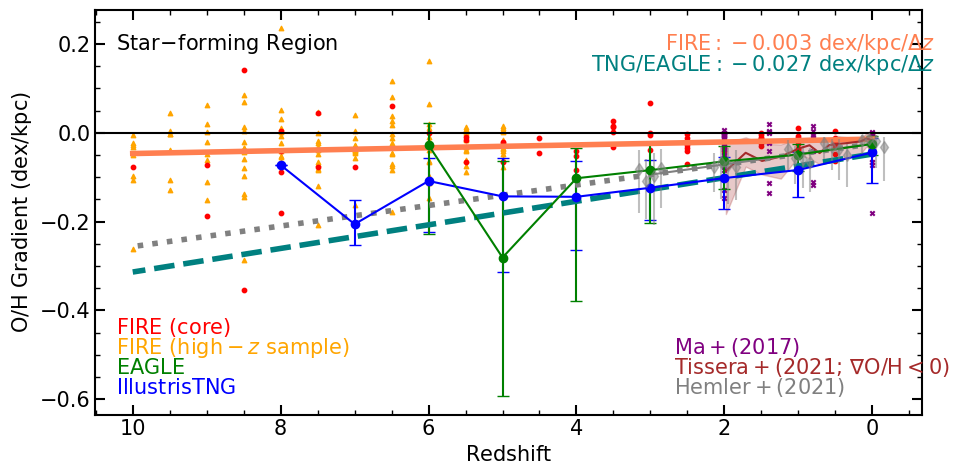

In [10]:
plt.figure(figsize=(10,5))

def plot_main( x,y,y_down,y_up,color ):
    
    plt.errorbar( x, y, yerr=(y-y_down,y_up-y), capsize=4, color=color, marker='o' )

def plot_errorbar(x,y,y_down,y_up,x_left,x_right,color='g',marker='+'):
    
    plt.errorbar( x, y, yerr=(y-y_down, y_up-y), xerr=(x-x_right, x_left-x),
                  marker=marker, color=color, ls='none', markersize=15, capsize=6 )

def plot_errorbar_space(x,y,y_down,y_up,offset=0,color='g'):

    plt.errorbar( x[offset::4], y[offset::4], yerr=(y[offset::4]-y_down[offset::4], y_up[offset::4]-y[offset::4]),
                  marker='d', color=color, ls='none', alpha=0.5 )

def plot_fill_between(x,y,y_down,y_up,color='r'):
    
    plt.plot( x, y, color=color )
    plt.fill_between( x, y_up, y_down, color=color, alpha=0.25 )
    
def plot_all_points( zs, all_y, marker='^', color='r', size=10 ):
    
    for index, z in enumerate(zs):
        y = all_y[index]
        x = np.ones( len(y) ) * z
        
        plt.scatter( x, y, marker=marker, color=color, s=size )

def get_line( x1, y1, x2, y2 ):
    
    combined_x = []
    combined_y = []
    
    for index, x in enumerate(x1):
        this_y = np.array(y1[index])
        this_y = this_y[~np.isnan(this_y)]
        this_x = np.ones( len(this_y) ) * x
        
        combined_x += list(this_x)
        combined_y += list(this_y)
        
    for index, x in enumerate(x2):
        this_y = np.array(y2[index])
        this_y = this_y[~np.isnan(this_y)]
        this_x = np.ones( len(this_y) ) * x
        
        combined_x += list(this_x)
        combined_y += list(this_y)
        
    combined_x = np.array(combined_x)
    combined_y = np.array(combined_y)
    
    return np.polyfit( combined_x, combined_y, 1 )
    
TNG_col   = 'blue'
EAGLE_col = 'green'
FIRE_col  = 'orange'
FIRE2_col = 'red'
    
plot_main( np.arange(0,9), mean_TNG  , std_down_TNG  , std_up_TNG  , color=TNG_col   )
plot_main( np.arange(0,9), mean_EAGLE, std_down_EAGLE, std_up_EAGLE, color=EAGLE_col )
# plot_main( np.arange(5.0,10.5,0.5), mean_FIRE , std_down_FIRE , std_up_FIRE , color=FIRE_col  )
# plot_main( np.arange(0.0,10.5,0.5), mean_FIRE2, std_down_FIRE2, std_up_FIRE2, color=FIRE2_col )

# plot_all_points( np.arange(0,9), grad_TNG, marker='v', color=TNG_col, size=10 )
plot_all_points( np.arange(5.0,10.5,0.5), grad_FIRE , marker='^', color=FIRE_col , size=10 )
plot_all_points( np.arange(0.0,10.5,0.5), grad_FIRE2, marker='o', color=FIRE2_col, size=10 )
    
FIRE_slope, FIRE_intercept = get_line( np.arange(5.0,10.5,0.5), grad_FIRE ,
                                       np.arange(0.0,10.5,0.5), grad_FIRE2 )
  
Flinex = np.linspace(0,10,100)
Fliney = FIRE_slope * Flinex + FIRE_intercept

plt.plot( Flinex, Fliney, color='coral', lw=4 )

smooth_slope, smooth_intercept = get_line( np.arange(0.0,9.0), grad_TNG ,
                                           np.arange(0.0,9.0), grad_EAGLE )
  
Slinex = np.linspace(0,10,100)
Sliney = smooth_slope * Slinex + smooth_intercept

plt.plot( Slinex, Sliney, color='teal', lw=4, linestyle='--' )
    
plot_errorbar_space( H21_x, H21_y, H21_down_y, H21_up_y, offset=0, color='gray')#color='blue'   )
plot_errorbar_space( H21_x, H21_y, H21_down_y, H21_up_y, offset=1, color='gray')#color='green'  )
plot_errorbar_space( H21_x, H21_y, H21_down_y, H21_up_y, offset=2, color='gray')#color='yellow' )
plot_errorbar_space( H21_x, H21_y, H21_down_y, H21_up_y, offset=3, color='gray')#color='red'    )
    
# plot_errorbar( JWST_x, JWST_y, JWST_down_y, JWST_up_y, JWST_left_x, JWST_right_x,
#               color='maroon', marker='x' )

# plot_fill_between( T_21_x, T_21_y, T_21_y_up, T_21_y_down, color='b' )
plot_fill_between( T_21_n_x, T_21_n_y, T_21_n_y_up, T_21_n_y_down, color='brown' )

plt.scatter( M17_x, M17_y, color='purple', marker='x', s=10 )

zs = np.arange(0,11)
plt.plot( H21_line_x, H21_line_y, color='gray' )
plt.plot( zs, H21_slope*zs + H21_intercept, color='gray', linestyle=':', lw=4 )

plt.xlabel(r'${\rm Redshift}$')
plt.ylabel(r'${\rm O/H~Gradient~(dex/kpc)}$')

xmin, xmax = plt.xlim()
plt.xlim(xmax, xmin)

plt.axhline(0, color='k', linestyle='-')

plt.text( 0.025, 0.20, r'${\rm FIRE~(core)}$'               , color=FIRE2_col, transform=plt.gca().transAxes, ha='left' )
plt.text( 0.025, 0.15, r'${\rm FIRE~(high-}z~{\rm sample})$', color=FIRE_col , transform=plt.gca().transAxes, ha='left' )
plt.text( 0.025, 0.10, r'${\rm EAGLE}$'                     , color=EAGLE_col, transform=plt.gca().transAxes, ha='left' )
plt.text( 0.025, 0.05, r'${\rm IllustrisTNG}$'              , color=TNG_col  , transform=plt.gca().transAxes, ha='left' )


plt.text( 0.7, 0.15, r'${\rm Ma+(2017)}$', color='purple', transform=plt.gca().transAxes, ha='left' )
plt.text( 0.7, 0.10, r'${\rm Tissera+(2021;}\,\nabla{\rm O/H} < 0)$', color='brown', transform=plt.gca().transAxes, ha='left' )
plt.text( 0.7, 0.05, r'${\rm Hemler+(2021)}$', color='gray', transform=plt.gca().transAxes, ha='left' )
# plt.text( 0.7, 0.05, r'${\rm JWST}$'                      , color='maroon' , transform=plt.gca().transAxes, ha='left' )

# plt.text( 0.05, 0.05, r'$[0.5, 2.0]R_e$',transform=plt.gca().transAxes, ha='left' )
plt.text( 0.025, 0.9, r'${\rm Star\!-\!forming~Region}$',transform=plt.gca().transAxes, ha='left' )

plt.text( 0.65+0.04, 0.9 , r'${\rm FIRE:} %s ~{\rm dex/kpc/}\Delta z$' %round(FIRE_slope,3), transform=plt.gca().transAxes, ha='left', color='coral' )
plt.text( 0.56+0.04, 0.85, r'${\rm TNG/EAGLE:} %s ~{\rm dex/kpc/}\Delta z$' %round(smooth_slope,3), transform=plt.gca().transAxes, ha='left', color='teal' )

plt.tight_layout()
plt.savefig( save_dir+'all_comparisons.pdf', bbox_inches='tight' )

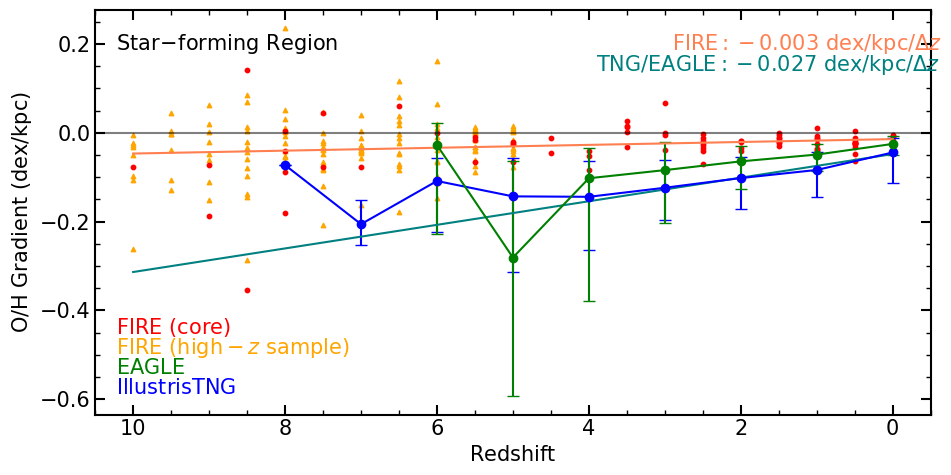

In [12]:
plt.figure(figsize=(10,5))

def plot_main( x,y,y_down,y_up,color ):
    
    plt.errorbar( x, y, yerr=(y-y_down,y_up-y), capsize=4, color=color, marker='o' )

def plot_errorbar(x,y,y_down,y_up,x_left,x_right,color='g',marker='+'):
    
    plt.errorbar( x, y, yerr=(y-y_down, y_up-y), xerr=(x-x_right, x_left-x),
                  marker=marker, color=color, ls='none', markersize=15, capsize=6 )

def plot_errorbar_space(x,y,y_down,y_up,offset=0,color='g'):

    plt.errorbar( x[offset::4], y[offset::4], yerr=(y[offset::4]-y_down[offset::4], y_up[offset::4]-y[offset::4]),
                  marker='d', color=color, ls='none', alpha=0.5 )

def plot_fill_between(x,y,y_down,y_up,color='r'):
    
    plt.plot( x, y, color=color )
    plt.fill_between( x, y_up, y_down, color=color, alpha=0.25 )
    
def plot_all_points( zs, all_y, marker='^', color='r', size=10 ):
    
    for index, z in enumerate(zs):
        y = all_y[index]
        x = np.ones( len(y) ) * z
        
        plt.scatter( x, y, marker=marker, color=color, s=size )

def get_line( x1, y1, x2, y2 ):
    
    combined_x = []
    combined_y = []
    
    for index, x in enumerate(x1):
        this_y = np.array(y1[index])
        this_y = this_y[~np.isnan(this_y)]
        this_x = np.ones( len(this_y) ) * x
        
        combined_x += list(this_x)
        combined_y += list(this_y)
        
    for index, x in enumerate(x2):
        this_y = np.array(y2[index])
        this_y = this_y[~np.isnan(this_y)]
        this_x = np.ones( len(this_y) ) * x
        
        combined_x += list(this_x)
        combined_y += list(this_y)
        
    combined_x = np.array(combined_x)
    combined_y = np.array(combined_y)
    
    return np.polyfit( combined_x, combined_y, 1 )
    
TNG_col   = 'blue'
EAGLE_col = 'green'
FIRE_col  = 'orange'
FIRE2_col = 'red'
    
plot_main( np.arange(0,9), mean_TNG  , std_down_TNG  , std_up_TNG  , color=TNG_col   )
plot_main( np.arange(0,9), mean_EAGLE, std_down_EAGLE, std_up_EAGLE, color=EAGLE_col )
# plot_main( np.arange(5.0,10.5,0.5), mean_FIRE , std_down_FIRE , std_up_FIRE , color=FIRE_col  )
# plot_main( np.arange(0.0,10.5,0.5), mean_FIRE2, std_down_FIRE2, std_up_FIRE2, color=FIRE2_col )

# plot_all_points( np.arange(0,9), grad_TNG, marker='v', color=TNG_col, size=10 )
plot_all_points( np.arange(5.0,10.5,0.5), grad_FIRE , marker='^', color=FIRE_col , size=10 )
plot_all_points( np.arange(0.0,10.5,0.5), grad_FIRE2, marker='o', color=FIRE2_col, size=10 )
    
FIRE_slope, FIRE_intercept = get_line( np.arange(5.0,10.5,0.5), grad_FIRE ,
                                       np.arange(0.0,10.5,0.5), grad_FIRE2 )
  
Flinex = np.linspace(0,10,100)
Fliney = FIRE_slope * Flinex + FIRE_intercept

plt.plot( Flinex, Fliney, color='coral' )

smooth_slope, smooth_intercept = get_line( np.arange(0.0,9.0), grad_TNG ,
                                           np.arange(0.0,9.0), grad_EAGLE )
  
Slinex = np.linspace(0,10,100)
Sliney = smooth_slope * Slinex + smooth_intercept

plt.plot( Slinex, Sliney, color='teal' )
    
# plot_errorbar_space( H21_x, H21_y, H21_down_y, H21_up_y, offset=0, color='gray')#color='blue'   )
# plot_errorbar_space( H21_x, H21_y, H21_down_y, H21_up_y, offset=1, color='gray')#color='green'  )
# plot_errorbar_space( H21_x, H21_y, H21_down_y, H21_up_y, offset=2, color='gray')#color='yellow' )
# plot_errorbar_space( H21_x, H21_y, H21_down_y, H21_up_y, offset=3, color='gray')#color='red'    )
    
# plot_errorbar( JWST_x, JWST_y, JWST_down_y, JWST_up_y, JWST_left_x, JWST_right_x,
#               color='maroon', marker='x' )

# plot_fill_between( T_21_x, T_21_y, T_21_y_up, T_21_y_down, color='b' )
# plot_fill_between( T_21_n_x, T_21_n_y, T_21_n_y_up, T_21_n_y_down, color='brown' )

# plt.scatter( M17_x, M17_y, color='k', marker='x', s=10 )

# zs = np.arange(0,11)
# plt.plot( H21_line_x, H21_line_y, color='gray' )
# plt.plot( zs, H21_slope*zs + H21_intercept, color='gray', linestyle=':', lw=4 )

plt.xlabel(r'${\rm Redshift}$')
plt.ylabel(r'${\rm O/H~Gradient~(dex/kpc)}$')

xmin, xmax = plt.xlim()
plt.xlim(xmax, xmin)

plt.axhline(0, color='k', linestyle='-',alpha=0.5)

plt.text( 0.025, 0.20, r'${\rm FIRE~(core)}$'               , color=FIRE2_col, transform=plt.gca().transAxes, ha='left' )
plt.text( 0.025, 0.15, r'${\rm FIRE~(high-}z~{\rm sample})$', color=FIRE_col , transform=plt.gca().transAxes, ha='left' )
plt.text( 0.025, 0.10, r'${\rm EAGLE}$'                     , color=EAGLE_col, transform=plt.gca().transAxes, ha='left' )
plt.text( 0.025, 0.05, r'${\rm IllustrisTNG}$'              , color=TNG_col  , transform=plt.gca().transAxes, ha='left' )


# plt.text( 0.7, 0.15, r'${\rm Ma+(2017)}$', color='k', transform=plt.gca().transAxes, ha='left' )
# plt.text( 0.7, 0.10, r'${\rm Tissera+(2021;}\,\nabla{\rm O/H} < 0)$', color='brown', transform=plt.gca().transAxes, ha='left' )
# plt.text( 0.7, 0.05, r'${\rm Hemler+(2021)}$', color='gray', transform=plt.gca().transAxes, ha='left' )
# plt.text( 0.7, 0.05, r'${\rm JWST}$'                      , color='maroon' , transform=plt.gca().transAxes, ha='left' )

# plt.text( 0.05, 0.05, r'$[0.5, 2.0]R_e$',transform=plt.gca().transAxes, ha='left' )
plt.text( 0.025, 0.9, r'${\rm Star\!-\!forming~Region}$',transform=plt.gca().transAxes, ha='left' )

plt.text( 0.65+0.04, 0.9 , r'${\rm FIRE:} %s ~{\rm dex/kpc/}\Delta z$' %round(FIRE_slope,3), transform=plt.gca().transAxes, ha='left', color='coral' )
plt.text( 0.56+0.04, 0.85, r'${\rm TNG/EAGLE:} %s ~{\rm dex/kpc/}\Delta z$' %round(smooth_slope,3), transform=plt.gca().transAxes, ha='left', color='teal' )

plt.tight_layout()
plt.savefig( save_dir+'all_comparisons_no_lit.pdf', bbox_inches='tight' )